In [40]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [41]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [4]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [5]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [39]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 100)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []
classes = [[4,5],[2,3],[1,3,5]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1508
number of class2:2927

 ****** Running generation 0 ****** 

Population's average fitness: 0.57990 stdev: 0.12916
Best fitness: 0.78534 - size: (2, 7) - species 1 - id 142
Average adjusted fitness: 0.258
Mean genetic distance 2.925, standard deviation 0.530
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 10.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57220 stdev: 0.13857
Best fitness: 0.78534 - size: (2, 7) - species 3 - id 142
Average adjusted fitness: 0.263
Mean genetic distance 2.978, standard deviation 0.529
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 10.992 sec (10.704 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59524 stdev: 0.12486
Best fitness: 0.78534 - size: (2, 7) - species 18 - id 142
Average adjusted fitness: 0.251
Mean genetic distance 2.924, standard deviation 0.541
Population of 199 members in 22 species
Total extinc

Population's average fitness: 0.58526 stdev: 0.14220
Best fitness: 0.80924 - size: (2, 9) - species 16 - id 2653
Average adjusted fitness: 0.236
Mean genetic distance 2.983, standard deviation 0.604
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 14.849 sec (14.179 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58709 stdev: 0.14131
Best fitness: 0.80924 - size: (2, 9) - species 16 - id 2653
Average adjusted fitness: 0.236
Mean genetic distance 3.038, standard deviation 0.620
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.346 sec (14.352 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.57542 stdev: 0.14978
Best fitness: 0.80924 - size: (2, 9) - species 16 - id 2653
Average adjusted fitness: 0.222
Mean genetic distance 3.046, standard deviation 0.618
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.597 sec (14.567 average)

 ***

Population of 193 members in 22 species
Total extinctions: 0
Generation time: 15.727 sec (16.131 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.60970 stdev: 0.12957
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.270
Mean genetic distance 3.108, standard deviation 0.558
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 16.038 sec (16.181 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.59794 stdev: 0.14011
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.247
Mean genetic distance 3.116, standard deviation 0.569
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 17.579 sec (16.104 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.60080 stdev: 0.13869
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.261
Mean genetic dis

Population of 197 members in 22 species
Total extinctions: 0
Generation time: 16.826 sec (16.916 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.59864 stdev: 0.14826
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.301
Mean genetic distance 3.017, standard deviation 0.569
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 16.632 sec (17.009 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.59142 stdev: 0.14986
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.261
Mean genetic distance 3.007, standard deviation 0.570
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 16.412 sec (17.050 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.60549 stdev: 0.14451
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.264
Mean genetic dis

Population's average fitness: 0.59435 stdev: 0.14587
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.256
Mean genetic distance 2.866, standard deviation 0.643
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 17.995 sec (17.447 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.60176 stdev: 0.13785
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.265
Mean genetic distance 2.844, standard deviation 0.647
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 17.154 sec (17.488 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.57855 stdev: 0.15222
Best fitness: 0.86742 - size: (7, 17) - species 37 - id 6311
Average adjusted fitness: 0.226
Mean genetic distance 2.875, standard deviation 0.618
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 18.099 sec (17.626 average)
num

Population's average fitness: 0.58869 stdev: 0.16067
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.275
Mean genetic distance 3.028, standard deviation 0.597
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.596 sec (12.599 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62762 stdev: 0.13371
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.315
Mean genetic distance 3.004, standard deviation 0.556
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 14.167 sec (12.831 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63052 stdev: 0.12771
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.326
Mean genetic distance 2.994, standard deviation 0.558
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 14.305 sec (13.031 average)

 

Population's average fitness: 0.62753 stdev: 0.13015
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.317
Mean genetic distance 3.021, standard deviation 0.555
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 15.014 sec (14.552 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.61341 stdev: 0.14666
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.305
Mean genetic distance 3.025, standard deviation 0.545
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 15.717 sec (14.700 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64231 stdev: 0.11877
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.347
Mean genetic distance 3.049, standard deviation 0.562
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 15.214 sec (14.761 average)

 

Generation time: 24.417 sec (18.793 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.61790 stdev: 0.13839
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.291
Mean genetic distance 3.006, standard deviation 0.594
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 21.068 sec (19.280 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.59353 stdev: 0.14984
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.291
Mean genetic distance 3.020, standard deviation 0.569
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 18.142 sec (19.431 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.61736 stdev: 0.13667
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.308
Mean genetic distance 3.000, standard deviation 0.579
Population of 202 membe

Population's average fitness: 0.61920 stdev: 0.13612
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.311
Mean genetic distance 3.019, standard deviation 0.595
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 19.705 sec (19.864 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.62614 stdev: 0.13381
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.317
Mean genetic distance 3.001, standard deviation 0.581
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 19.759 sec (19.837 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.61044 stdev: 0.14744
Best fitness: 0.75761 - size: (5, 12) - species 29 - id 2303
Average adjusted fitness: 0.290
Mean genetic distance 2.960, standard deviation 0.584
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 19.155 sec (19.753 average)

 


 ****** Running generation 17 ****** 

Population's average fitness: 0.56044 stdev: 0.08866
Best fitness: 0.71342 - size: (5, 12) - species 28 - id 629
Average adjusted fitness: 0.217
Mean genetic distance 3.149, standard deviation 0.551
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 14.302 sec (13.800 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.56350 stdev: 0.07998
Best fitness: 0.71342 - size: (5, 12) - species 28 - id 629
Average adjusted fitness: 0.276
Mean genetic distance 3.193, standard deviation 0.553
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 15.033 sec (13.965 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55917 stdev: 0.08873
Best fitness: 0.75603 - size: (6, 14) - species 8 - id 2956
Average adjusted fitness: 0.231
Mean genetic distance 3.202, standard deviation 0.555
Population of 197 members in 26 species
Total extinctions: 0
Generation

Generation time: 16.584 sec (16.133 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.55678 stdev: 0.09116
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.205
Mean genetic distance 3.234, standard deviation 0.540
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 16.570 sec (16.214 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.55082 stdev: 0.09371
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.220
Mean genetic distance 3.203, standard deviation 0.564
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 16.947 sec (16.359 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.56179 stdev: 0.09087
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.224
Mean genetic distance 3.180, standard deviation 0.579
Population of 198 membe

Population's average fitness: 0.56516 stdev: 0.09026
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.206
Mean genetic distance 3.253, standard deviation 0.558
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.776 sec (17.366 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.55689 stdev: 0.09239
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.208
Mean genetic distance 3.224, standard deviation 0.566
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 17.024 sec (17.310 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.56594 stdev: 0.08834
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.211
Mean genetic distance 3.228, standard deviation 0.545
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.541 sec (17.224 average)

 

Population's average fitness: 0.56718 stdev: 0.10177
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.236
Mean genetic distance 3.133, standard deviation 0.622
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 24.485 sec (19.500 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.55943 stdev: 0.09817
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.215
Mean genetic distance 3.113, standard deviation 0.620
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 22.781 sec (19.929 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.56242 stdev: 0.10223
Best fitness: 0.75603 - size: (6, 14) - species 36 - id 2956
Average adjusted fitness: 0.218
Mean genetic distance 3.043, standard deviation 0.604
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 23.162 sec (20.344 average)

 

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
number_codes = [[0, 0, 0],
[0, 0, 1],
[0, 1, 0],
[0, 1, 1],
[1, 0, 0],
[1, 0, 1]]

In [22]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(3):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(3 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [38]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/2000

0.5505

In [24]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:0 index:[0] real:2
#1 min_error:0 index:[0] real:2
#2 min_error:0 index:[0] real:3
#3 min_error:0 index:[2] real:3
#4 min_error:0 index:[2] real:3
#5 min_error:0 index:[3] real:3
#6 min_error:1 index:[3 5] real:3
#7 min_error:0 index:[5] real:3
#8 min_error:0 index:[4] real:3
#9 min_error:0 index:[4] real:3
#10 min_error:0 index:[4] real:3
#11 min_error:0 index:[4] real:3
#12 min_error:0 index:[4] real:3
#13 min_error:0 index:[4] real:3
#14 min_error:0 index:[1] real:2
#15 min_error:0 index:[2] real:2
#16 min_error:0 index:[0] real:2
#17 min_error:0 index:[0] real:2
#18 min_error:0 index:[0] real:2
#19 min_error:0 index:[1] real:2
#20 min_error:0 index:[2] real:2
#21 min_error:0 index:[0] real:2
#22 min_error:0 index:[0] real:2
#23 min_error:0 index:[1] real:2
#24 min_error:0 index:[2] real:2
#25 min_error:0 index:[2] real:2
#26 min_error:0 index:[0] real:2
#27 min_error:0 index:[5] real:4
#28 min_error:0 index:[1] real:5
#29 min_error:0 index:[5] real:5
#30 min_error:1 in

#599 min_error:0 index:[5] real:4
#600 min_error:0 index:[5] real:4
#601 min_error:0 index:[1] real:1
#602 min_error:0 index:[1] real:1
#603 min_error:0 index:[2] real:3
#604 min_error:0 index:[1] real:2
#605 min_error:0 index:[1] real:1
#606 min_error:0 index:[1] real:1
#607 min_error:0 index:[1] real:1
#608 min_error:0 index:[1] real:1
#609 min_error:0 index:[5] real:5
#610 min_error:0 index:[5] real:5
#611 min_error:0 index:[5] real:5
#612 min_error:0 index:[5] real:5
#613 min_error:0 index:[5] real:5
#614 min_error:0 index:[5] real:5
#615 min_error:0 index:[5] real:5
#616 min_error:0 index:[5] real:5
#617 min_error:0 index:[5] real:5
#618 min_error:1 index:[3 5] real:5
#619 min_error:0 index:[5] real:5
#620 min_error:1 index:[3 5] real:5
#621 min_error:0 index:[5] real:5
#622 min_error:0 index:[5] real:5
#623 min_error:0 index:[5] real:4
#624 min_error:0 index:[5] real:4
#625 min_error:0 index:[1] real:1
#626 min_error:0 index:[1] real:1
#627 min_error:0 index:[1] real:1
#628 min_e

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[426   4 115  18  20   7]
 [  5 208  46  31  76  31]
 [  1   1 138  25   2  16]
 [  0   0  96  56  10 107]
 [ 27   0   1  23   3  38]
 [  2  11   1  58 126 271]]


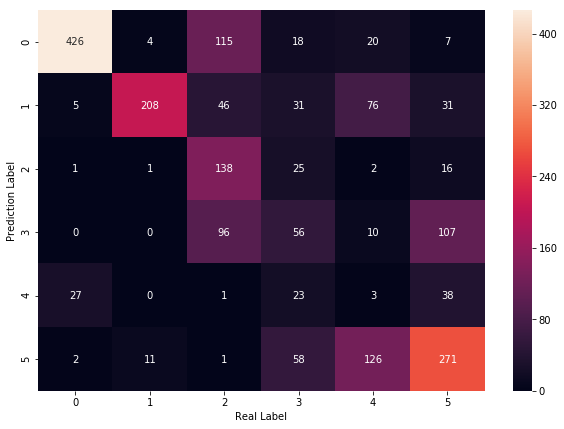

In [36]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()